# INTRODUCTION

In [349]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Importing Neccessary Libraries :

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.pipeline import Pipeline
import pickle

# Importing Dataset (from SQL after Data Querying)

In [353]:
air = pd.read_csv('C:/data/passengers_raw.csv')

## To get First Few Records of the dataset (to understand its structure)

In [355]:
air.head(5)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [356]:
#shows all the columns available
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr",False)
pd.set_option("max_colwidth",None)

In [357]:
air.head(2)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied


## To Check the Shape of the dataset 

In [359]:
air.shape

(25976, 24)

## To Get the Information about the dataset

In [361]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer_Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type_of_Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight_Distance                    25976 non-null  int64  
 7   Inflight_wifi_service              25976 non-null  int64  
 8   Departure_Arrival_time_convenient  25976 non-null  int64  
 9   Ease_of_Online_booking             25976 non-null  int64  
 10  Gate_location                      25976 non-null  int64  
 11  Food_and_drink                     25976 non-null  int

In [362]:
air.drop('id', axis=1, inplace=True)

## To Get the Statistical Summary of numerical column

In [364]:
air.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


## To get the Statistical Summary of categorical column

In [366]:
air.describe(include=['object', 'category'])

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


## To Get all the Column

In [368]:
air.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

## To check in the Satisfaction Column How many Unique Values are there 

In [370]:
air['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

# DATA CLEANING 

In [372]:
# To Check is there any null values present in the dataset 
air.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure_Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On_board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

In [373]:
# Filling the null values with their Mean as nulls are in the Numercial Column
air['Arrival_Delay_in_Minutes'] = air['Arrival_Delay_in_Minutes'].fillna(air['Arrival_Delay_in_Minutes'].mean())

In [374]:
# Again checking to see the changes
air.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [375]:
# Checking if there are any Duplicate values present in the dataset 
air.duplicated().sum()

0

In [394]:
# Checking the Datatype of each column
air.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

In [396]:
service_cols = ['Inflight_wifi_service','Departure_Arrival_time_convenient','Ease_of_Online_booking','Gate_location',
                'Food_and_drink','Online_boarding','Seat_comfort','Inflight_entertainment','On_board_service',
                'On_board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service',
                'Cleanliness']

# Clips the range to 0-5 :
for col in service_cols:
    air[col] = air[col].clip(0,5)

In [398]:
# Encoding the Satisfaction using Label Encoder :

# Initializing the Label Encoder
le = LabelEncoder()

# Fit the encoder
air['satisfaction'] = le.fit_transform(air['satisfaction'])

# Feature Engineering :

In [400]:
# Calculating Total Delay :
air['Total_Delay'] = air['Arrival_Delay_in_Minutes']+ air['Departure_Delay_in_Minutes']
air['Total_Delay'] = air['Total_Delay'].fillna(0)
# Created TOTAL DELAY feature by summing the arrival delay and departure delay to capture the overall delay impact on the passenger satisfaction.


# Average Service Rating 
air['avg_service_rating'] = air[service_cols].mean(axis=1)


# Significant delay indicator :
air['significant_delay'] = (air['Total_Delay'] > 30).astype(int)


# Calculating Flight Distance To Delay Ratio :
air['delay_to_distance_ratio'] = air['Total_Delay'] / air['Flight_Distance']
air['delay_to_distance_ratio'] = air['delay_to_distance_ratio'].fillna(0)

### Plotting Satisfied Vs Dissatisfied to check for the class imbalance

In [402]:
air.groupby('satisfaction').satisfaction.count()

satisfaction
0    14573
1    11403
Name: satisfaction, dtype: int64

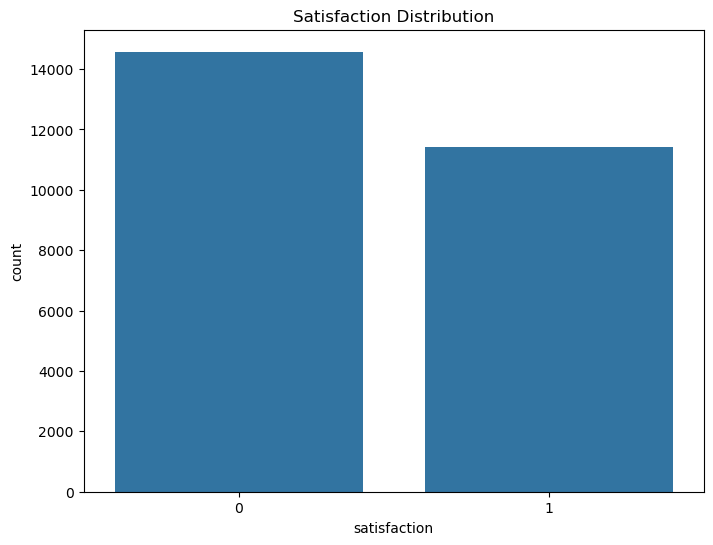

In [404]:
plt.figure(figsize=(8,6))
sns.countplot(x='satisfaction',data=air)
plt.title("Satisfaction Distribution")
plt.show()

### Downsampling the minority class to make it imbalance

In [406]:
# Separate the two classes
class_0 = air[air['satisfaction'] == 0]
class_1 = air[air['satisfaction'] == 1]

# Downsample class_1 to 20% of its original size 
class_1_downsampled = class_1.sample(frac=0.2, random_state=42)

# Combine to make the new imbalanced dataset
air_imbalanced = pd.concat([class_0, class_1_downsampled])

# Shuffle the dataset
air_imbalanced = shuffle(air_imbalanced, random_state=42)

# Check new class distribution
print(air_imbalanced['satisfaction'].value_counts(normalize=True))

satisfaction
0    0.864661
1    0.135339
Name: proportion, dtype: float64


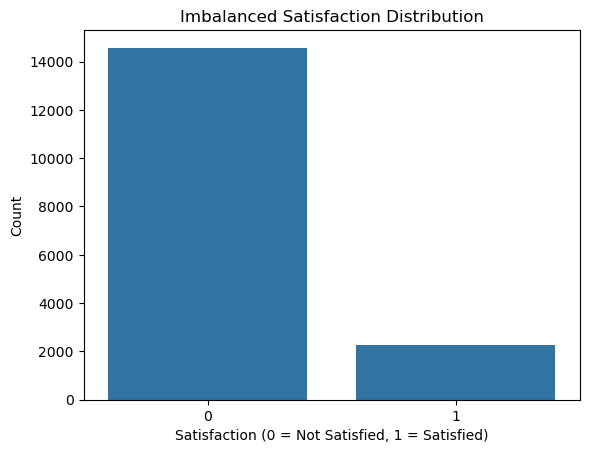

In [408]:
# Visualize the imbalanced class
sns.countplot(data=air_imbalanced, x='satisfaction')
plt.title('Imbalanced Satisfaction Distribution')
plt.xlabel('Satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Count')
plt.show()

#### Plot Gender Distribution to observe the balance of Male Vs Female Passengers

In [410]:
air.groupby('Gender').Gender.count()

Gender
Female    13172
Male      12804
Name: Gender, dtype: int64

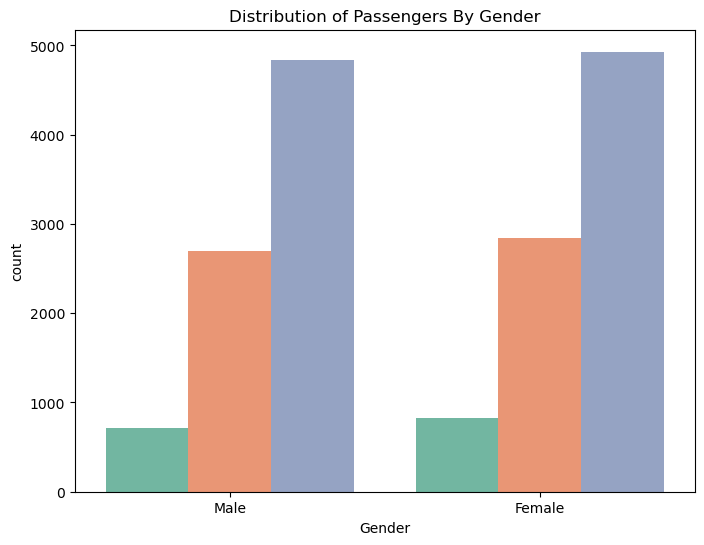

In [412]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=air_imbalanced,legend=False,hue='Class',palette='Set2')
plt.title("Distribution of Passengers By Gender")
plt.show()

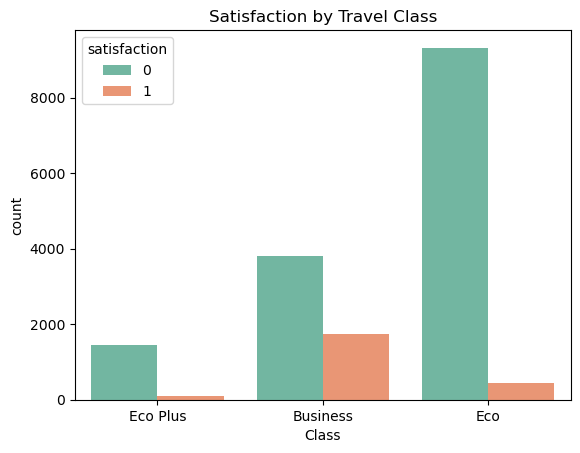

In [414]:
#Class vs Satisfaction
sns.countplot(x='Class', hue='satisfaction', data=air_imbalanced , palette='Set2')
plt.title('Satisfaction by Travel Class')
plt.show()

#### Plotting Customer Type to analyze the distribution of Loyal Vs Disloyal Customers

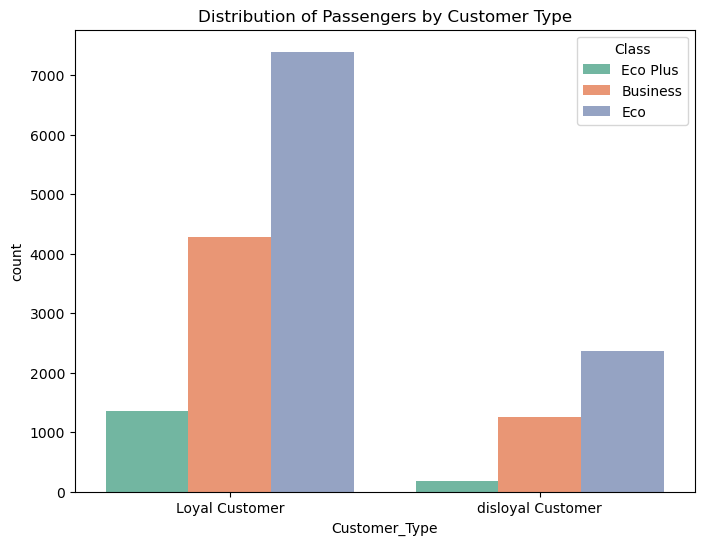

In [416]:
plt.figure(figsize=(8,6))
sns.countplot(x='Customer_Type',data=air_imbalanced,hue='Class',palette='Set2')
plt.title("Distribution of Passengers by Customer Type")
plt.show()

# Checking the Distribution of Numercial Columns

#### Distribution of satisfaction scores across different age groups.

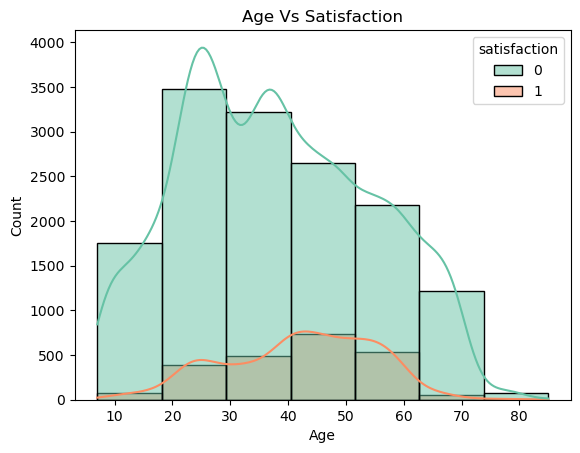

In [418]:
sns.histplot(bins=7,data=air_imbalanced,x='Age',kde=True,hue='satisfaction',palette='Set2')
plt.title("Age Vs Satisfaction")
plt.show()

In [ ]:
# Comparing satisfaction scores based on ease of online booking ratings.

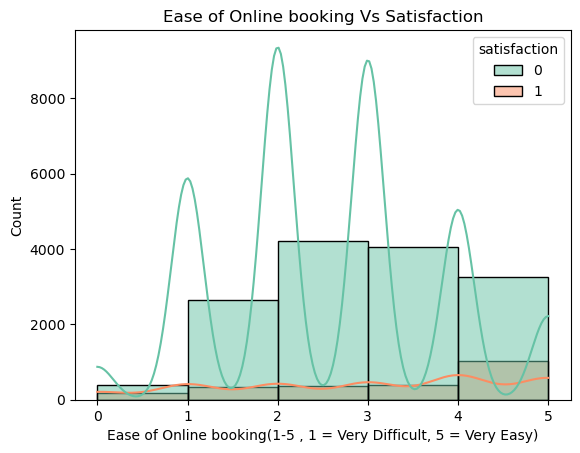

In [420]:
sns.histplot(bins=5,data=air_imbalanced,x='Ease_of_Online_booking',kde=True,hue='satisfaction',palette='Set2')
plt.title("Ease of Online booking Vs Satisfaction")
plt.xlabel("Ease of Online booking(1-5 , 1 = Very Difficult, 5 = Very Easy)")
plt.show()

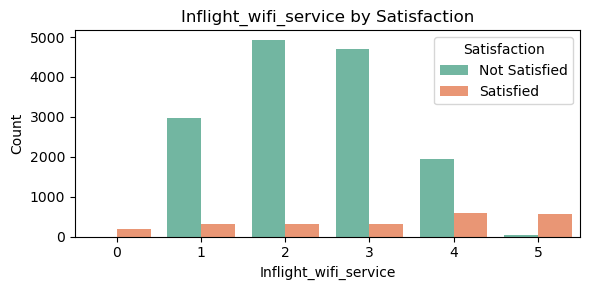

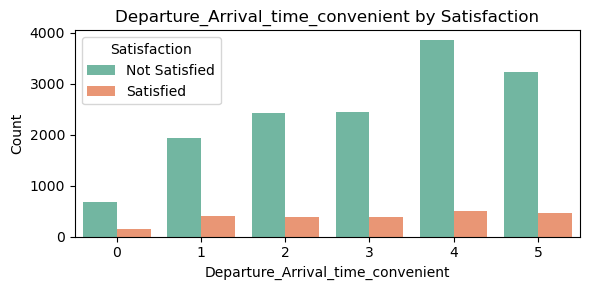

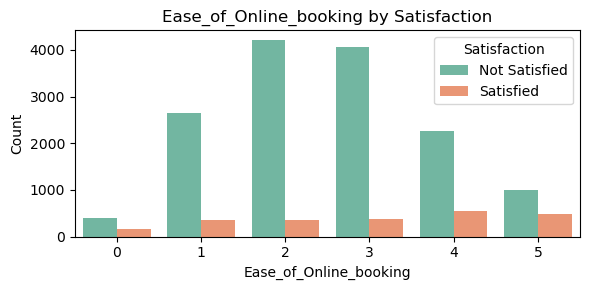

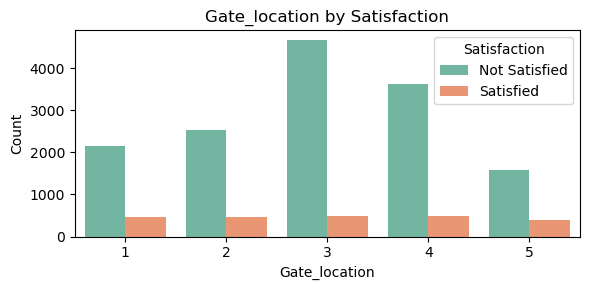

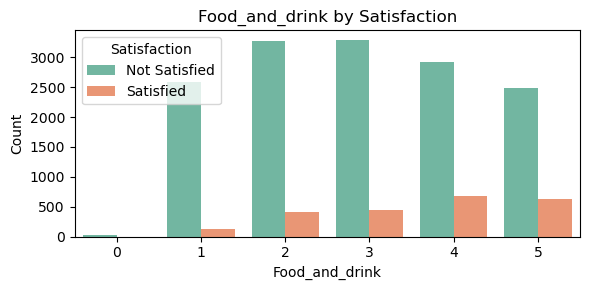

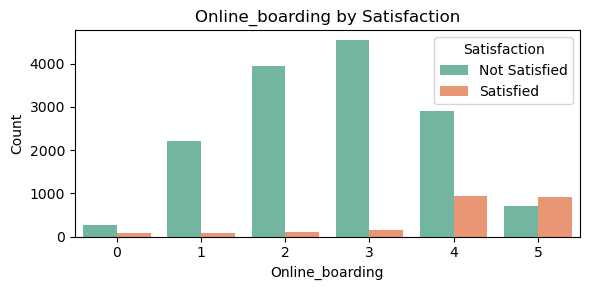

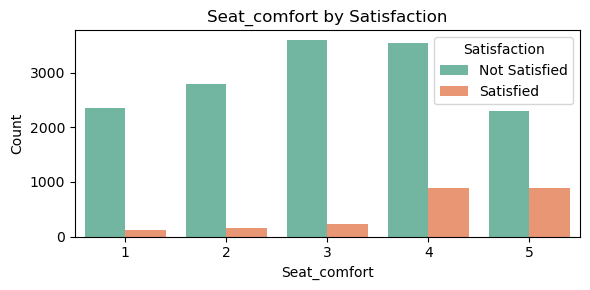

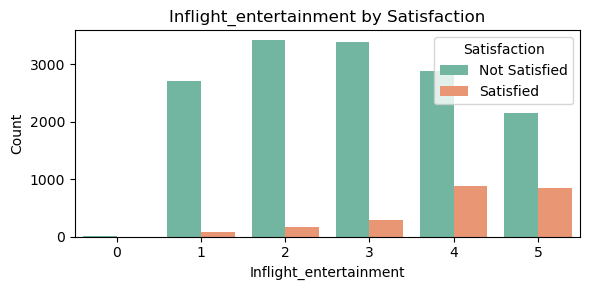

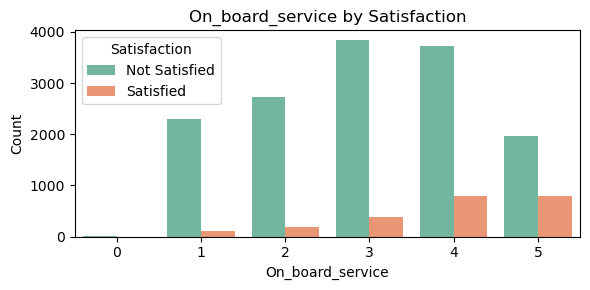

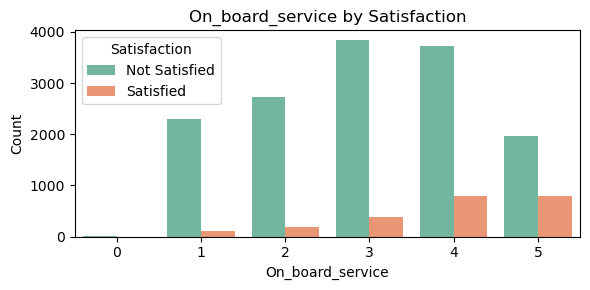

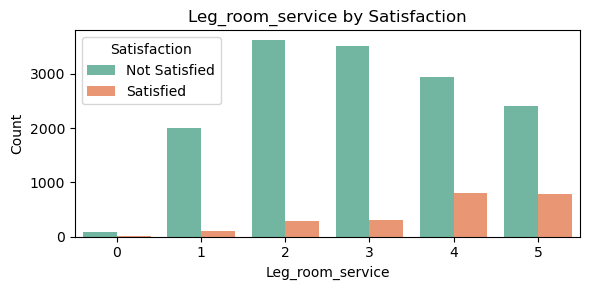

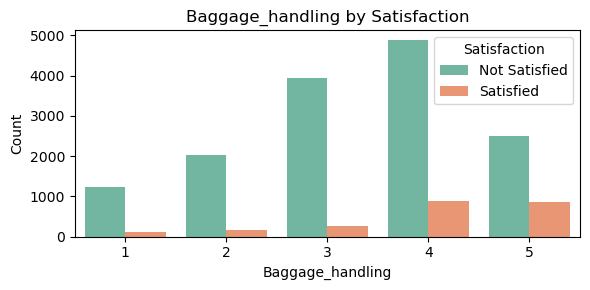

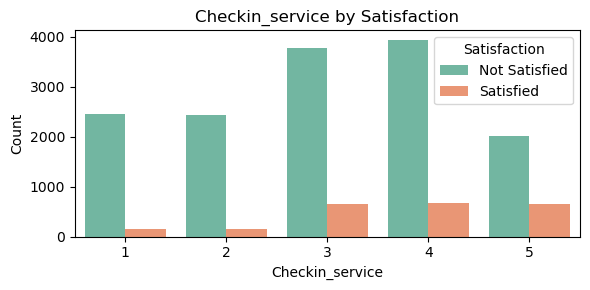

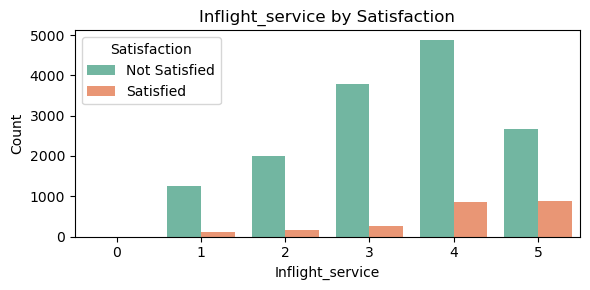

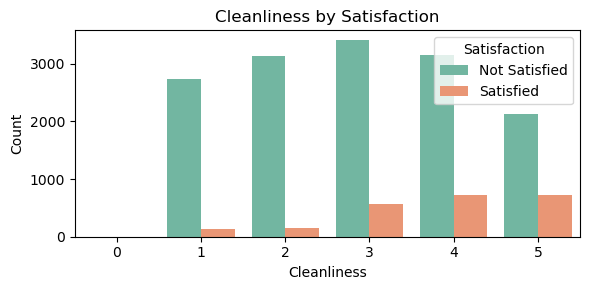

In [422]:
for col in service_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=air_imbalanced, x=col, hue='satisfaction', palette='Set2')
    plt.title(f'{col} by Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction', labels=['Not Satisfied', 'Satisfied'])
    plt.tight_layout()
    plt.show()


##### Analyzing how satisfaction varies with flight distance.

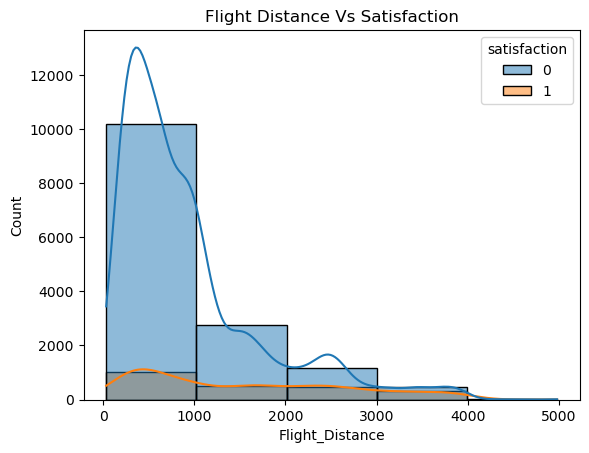

In [424]:
sns.histplot(bins=5,data=air_imbalanced,x='Flight_Distance',kde=True,hue='satisfaction')
plt.title("Flight Distance Vs Satisfaction")
plt.show()

## Checking For OUTLIERS :

##### Analyzing satisfaction levels for varying flight distances.

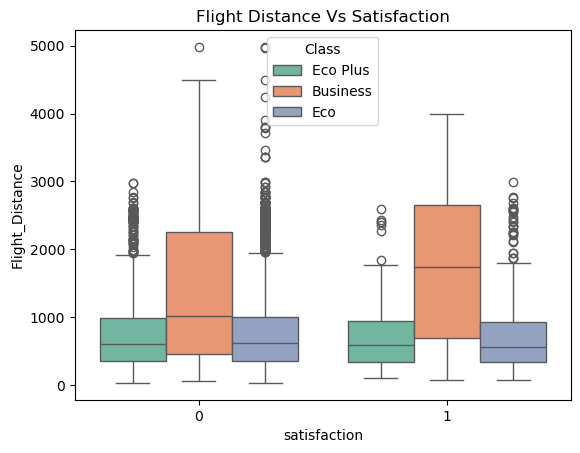

In [426]:
sns.boxplot(x="satisfaction",y="Flight_Distance",data=air_imbalanced,hue='Class',palette='Set2')
plt.title("Flight Distance Vs Satisfaction")
plt.show()

##### Comparing satisfaction distribution across different age groups.

C:\Users\aparn\AppData\Local\Temp\ipykernel_12964\1634570879.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="satisfaction",y="Age",data=air_imbalanced,palette='Set2',legend=False)


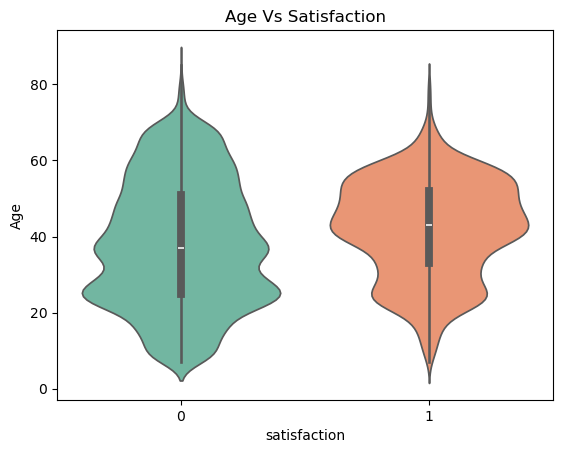

In [428]:
sns.violinplot(x="satisfaction",y="Age",data=air_imbalanced,palette='Set2',legend=False)
plt.title("Age Vs Satisfaction")
plt.show()

##### Visualizing how satisfaction changes with departure delays.

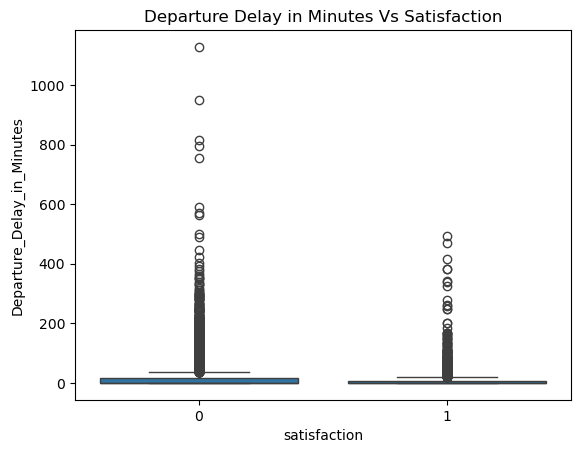

In [430]:
sns.boxplot(x="satisfaction",y="Departure_Delay_in_Minutes",data=air_imbalanced)
plt.title("Departure Delay in Minutes Vs Satisfaction")
plt.show()

##### Assessing the impact of arrival delays on customer satisfaction.

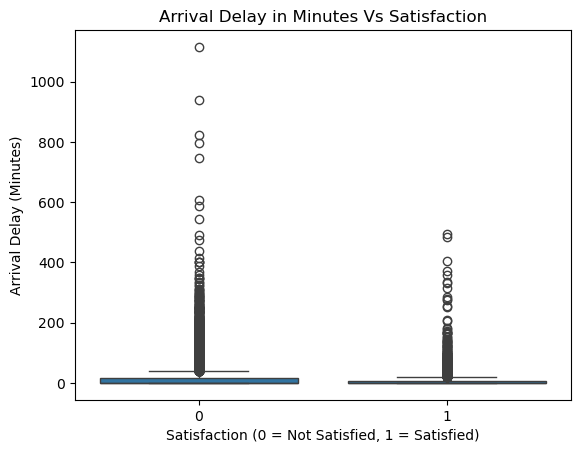

In [432]:
sns.boxplot(x="satisfaction",y="Arrival_Delay_in_Minutes",data=air_imbalanced)
plt.title("Arrival Delay in Minutes Vs Satisfaction")
plt.xlabel('Satisfaction (0 = Not Satisfied, 1 = Satisfied)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

# Encoding Categorical Columns :

In [434]:
# Identify categorical columns
categorical_cols = ['Class','Customer_Type','Type_of_Travel','Gender']

# Applying One-hot encoding
air_encoded = pd.get_dummies(air_imbalanced, columns=categorical_cols, drop_first=True)
    #drop_first=True avoids multicollinearity by dropping one dummy per category.


In [436]:
air_encoded.tail(3)

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Total_Delay,avg_service_rating,significant_delay,delay_to_distance_ratio,Class_Eco,Class_Eco Plus,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Gender_Male
9574,24,577,4,0,3,1,1,3,1,1,2,1,2,3,5,1,39,31.0,0,70.0,2.000000,1,0.121317,True,False,True,False,True
1586,26,655,1,1,1,3,4,1,1,4,2,5,4,4,3,4,0,0.0,0,0.0,2.666667,0,0.000000,True,False,False,True,True
10043,54,2592,5,5,5,5,5,4,5,5,5,5,5,3,5,3,8,6.0,1,14.0,4.666667,0,0.005401,False,False,False,False,False


In [438]:
# Casting the new cols from boolean to Integer to avoid any future issue :
air_encoded[['Class_Eco Plus', 'Class_Eco','Customer_Type_disloyal Customer','Type_of_Travel_Personal Travel','Gender_Male']] = air_encoded[['Class_Eco Plus', 'Class_Eco','Customer_Type_disloyal Customer','Type_of_Travel_Personal Travel','Gender_Male']].astype(int)

# Scailing some Numerical Features :

In [440]:
# Initializing the MinMaxScaler
sc = StandardScaler()

features = ['Age','Flight_Distance','Arrival_Delay_in_Minutes','Departure_Delay_in_Minutes','Total_Delay']
air_encoded[features] = sc.fit_transform(air_encoded[features])

In [442]:
air_encoded.tail(3)

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Total_Delay,avg_service_rating,significant_delay,delay_to_distance_ratio,Class_Eco,Class_Eco Plus,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Gender_Male
9574,-0.902650,-0.502185,4,0,3,1,1,3,1,1,2,1,2,3,5,1,0.597843,0.377066,0,0.491888,2.000000,1,0.121317,1,0,1,0,1
1586,-0.778455,-0.412669,1,1,1,3,4,1,1,4,2,5,4,4,3,4,-0.390860,-0.405086,0,-0.401826,2.666667,0,0.000000,1,0,0,1,1
10043,0.960275,1.810318,5,5,5,5,5,4,5,5,5,5,5,3,5,3,-0.188049,-0.253701,1,-0.223083,4.666667,0,0.005401,0,0,0,0,0


# CORRELATION ANALYSIS :

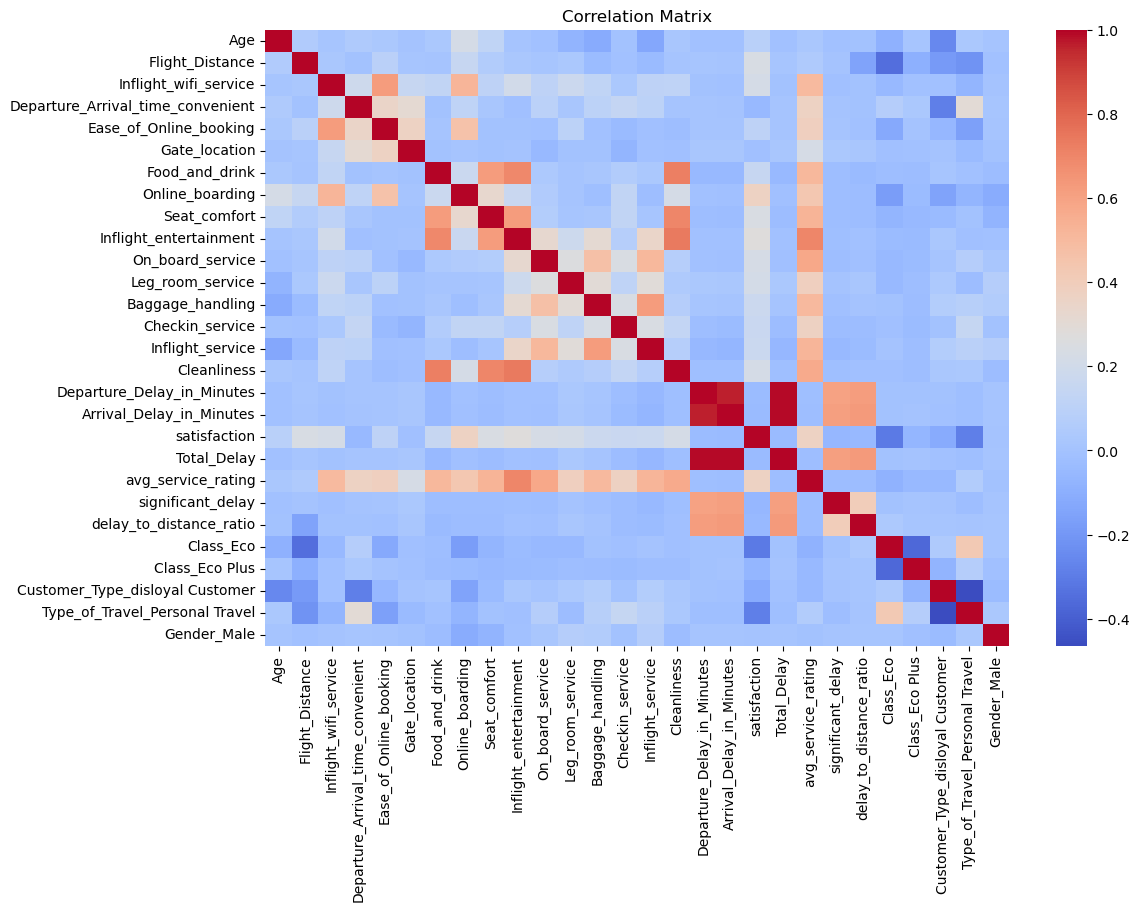

In [444]:
plt.figure(figsize=(12,8))
sns.heatmap(air_encoded.corr(),cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Defining X and Y variables :

In [446]:
# Independent Variable
X = air_encoded.drop('satisfaction',axis=1)

# Target Variable 
y = air_encoded['satisfaction']

# Train-Test Split 

In [ ]:
# Spliting the data into Training and Testing Set to evaluate the Model Performance on unseen data and avoid Overfitting.

In [448]:
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [450]:
print(f"The shape of the dataset :{ X_train.shape} ,{X_test.shape},{ y_train.shape }, {y_test.shape}")

The shape of the dataset :(11797, 27) ,(5057, 27),(11797,), (5057,)


## Applying RFE : (for Feature importance)

Selected Features : Index(['Age', 'Flight_Distance', 'Inflight_wifi_service', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'Leg_room_service',
       'avg_service_rating', 'Class_Eco', 'Type_of_Travel_Personal Travel'],
      dtype='object')


C:\Users\aparn\AppData\Local\Temp\ipykernel_12964\91699446.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set2')


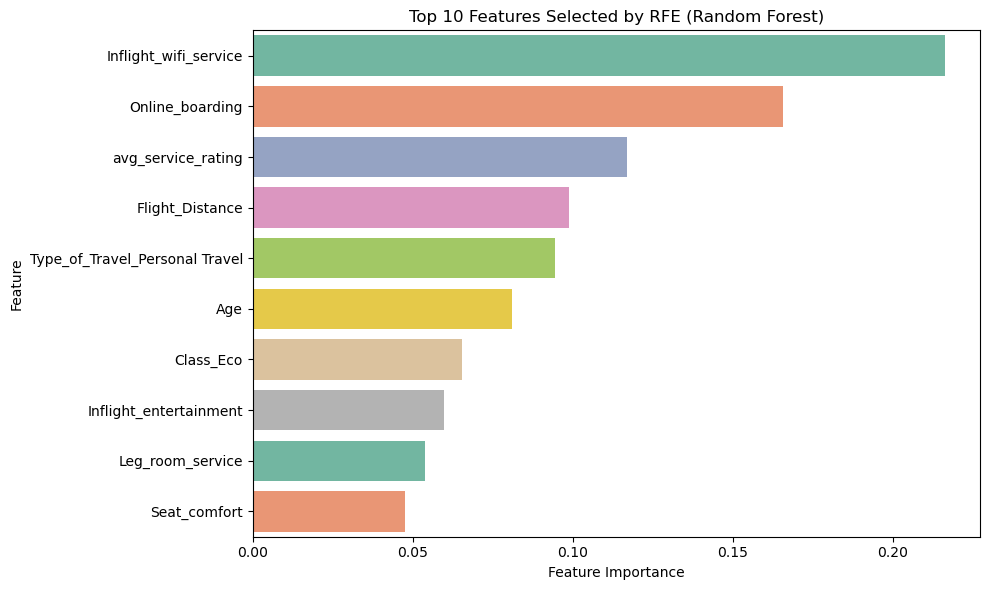

In [456]:
# Step 1: Choose Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Apply RFE to select top 10 features
selector = RFE(estimator=rf_model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Step 3: Get selected feature names
selected_features = X_train.columns[selector.support_]
print(f'Selected Features : {selected_features}')

# Step 4: Get feature importances from the fitted model inside RFE
importances = selector.estimator_.feature_importances_

# Step 5: Create DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set2')
plt.title('Top 10 Features Selected by RFE (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Model Building :

The classification report using Logistic Regression : 
 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4362
           1       0.86      0.63      0.73       695

    accuracy                           0.94      5057
   macro avg       0.90      0.81      0.85      5057
weighted avg       0.93      0.94      0.93      5057

************************************************************
Accuracy: 0.935930393513941
************************************************************


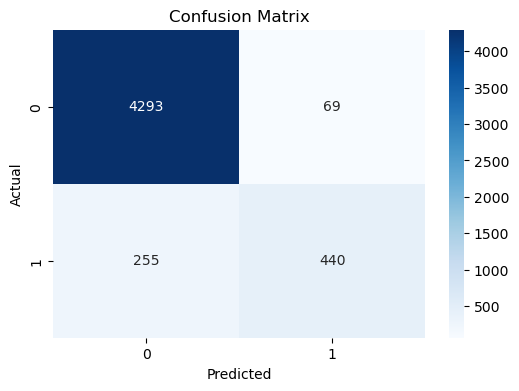

In [470]:
top_10_features = ['Age', 'Flight_Distance', 'Inflight_wifi_service', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'Leg_room_service',
       'avg_service_rating', 'Class_Eco', 'Type_of_Travel_Personal Travel']

X_train_t = X_train[top_10_features]
X_test_t = X_test[top_10_features]

# Initializing the Logistic Regression model
lor = LogisticRegression(max_iter=1000)

# Fit the model with training data 
lor.fit(X_train_t,y_train)

# Predicting labels for the test dataset  
y_pred_lor = lor.predict(X_test_t)

# Classification Report For Logistic Regression
print(f"The classification report using Logistic Regression : \n \n{classification_report(y_test,y_pred_lor)}")
print('**'*30)
print("Accuracy:", accuracy_score(y_test,y_pred_lor))
print('**'*30)
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lor)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest 

##### Random Forest,being an ensemble model ,is expected to capture more complex patterns :

The classification report using Random Forest: 
 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4362
           1       0.93      0.81      0.87       695

    accuracy                           0.97      5057
   macro avg       0.95      0.90      0.93      5057
weighted avg       0.97      0.97      0.97      5057

************************************************************
Accuracy: 0.9665809768637532
************************************************************


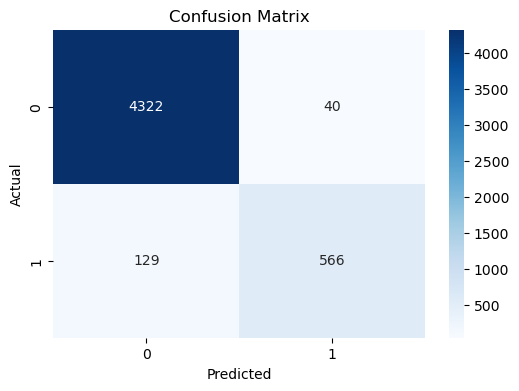

In [472]:
#  Initializing the Random Forest model
rf = RandomForestClassifier()

# Fit the model with training data
rf.fit(X_train_t,y_train)

# Predicting labels for the test dataset
y_pred_rf = rf.predict(X_test_t)

# Generating Classification Report For Random Forest
print(f"The classification report using Random Forest: \n \n{classification_report(y_test,y_pred_rf)}")
print('**'*30)
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print('**'*30)


#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Applying SMOTE on Random Forest :

#### To handle the class imbalance by oversampling the Minority Class (dissatisfied Passengers)

The classification report using LogisticRegression after applying SMOTE: 
 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4362
           1       0.81      0.88      0.84       695

    accuracy                           0.95      5057
   macro avg       0.89      0.92      0.91      5057
weighted avg       0.96      0.95      0.96      5057

************************************************************
Accuracy: 0.9545184892228594
************************************************************


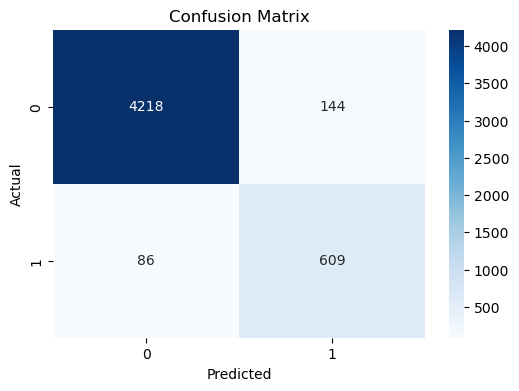

In [490]:
smote = SMOTE(random_state=3)

# To generate synthetic datapoints for Minority class to balance the imbalance dataset :
X_train_smote , y_train_smote = smote.fit_resample(X_train_t,y_train)

#  Initialize the RandomForest Model
rf_2 = RandomForestClassifier()

# Fit the model with training data 
rf_2.fit(X_train_smote,y_train_smote)

# Predicting labels for the test dataset using the Random Forest model
y_pred_rf_2 = rf_2.predict(X_test_t)

# Classification Report For Random Forest 
print(f"The classification report using LogisticRegression after applying SMOTE: \n \n{classification_report(y_test,y_pred_rf_2)}")
print('**'*30)
print("Accuracy:", accuracy_score(y_test,y_pred_rf_2))
print('**'*30)


#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_2)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Model Evaluation Using AUPRC Curve :

#### Random Forest Model 

AUPRC : 0.9268089960138959


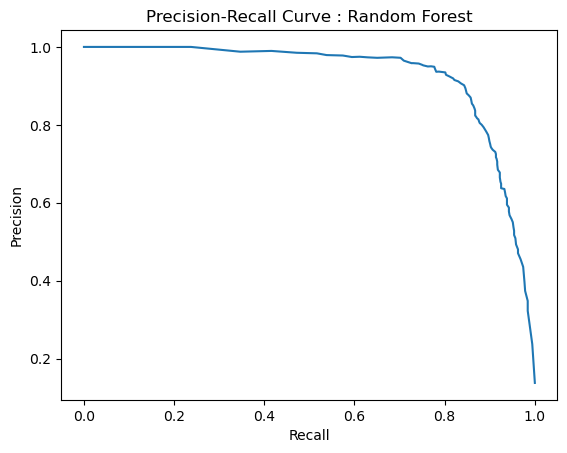

In [494]:
y_Scores = rf_2.predict_proba(X_test_t)[:,1]

# Calculate precision and recall
precision,recall,_ = precision_recall_curve(y_test,y_Scores)

# Calculate AUPRC
auprc = auc(recall,precision)
# Print AUPRC
print(f"AUPRC : {auprc}")


# Plot the precision-recall curve
plt.plot(recall,precision)
plt.title('Precision-Recall Curve : Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


## Applying Smote On Logistics Regression 

The classification report using LogisticRegression after applying SMOTE: 
 
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4362
           1       0.46      0.84      0.59       695

    accuracy                           0.84      5057
   macro avg       0.71      0.84      0.75      5057
weighted avg       0.90      0.84      0.86      5057

************************************************************
Accuracy: 0.841012457979039
************************************************************


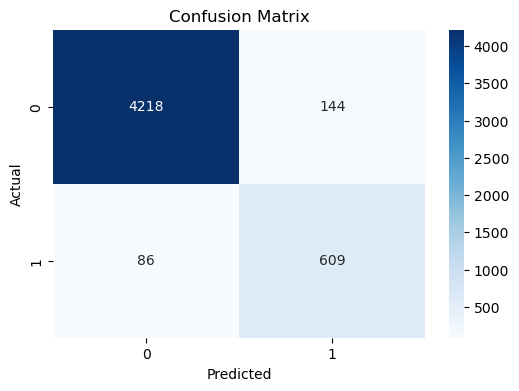

In [501]:
#  Initialize the RandomForest Model
lor_2 = LogisticRegression()

# Fit the model with training data 
lor_2.fit(X_train_smote,y_train_smote)

# Predicting labels for the test dataset using the Random Forest model
y_pred_lor_2 = lor_2.predict(X_test_t)

# Classification Report For Random Forest 
print(f"The classification report using LogisticRegression after applying SMOTE: \n \n{classification_report(y_test,y_pred_lor_2)}")
print('**'*30)
print("Accuracy:", accuracy_score(y_test,y_pred_lor_2))
print('**'*30)


#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_2)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AUPRC : 0.7914372966538847


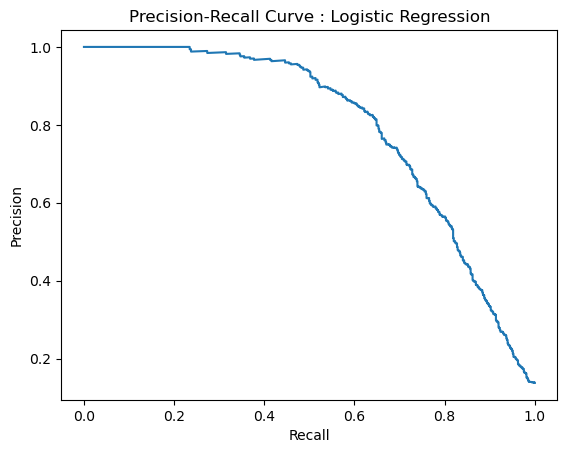

In [503]:
y_Scores = lor_2.predict_proba(X_test_t)[:,1]

# Calculate precision and recall
precision,recall,_ = precision_recall_curve(y_test,y_Scores)

# Calculate AUPRC
auprc = auc(recall,precision)
# Print AUPRC
print(f"AUPRC : {auprc}")


# Plot the precision-recall curve
plt.plot(recall,precision)
plt.title('Precision-Recall Curve : Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


## Hyper-Parameter Tuning 

In [511]:
# Define param distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='f1',
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model
random_search.fit(X_train_smote,y_train_smote)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 233}


In [523]:
best_parameters = random_search.best_params_


# Cross-Validation 

In [518]:
cv_scores = cross_val_score(random_search.best_estimator_,X_train_smote,y_train_smote,cv=5,scoring='accuracy')

print(f"Cross-Validation Accuracy : {cv_scores.mean():.4f}")

Cross-Validation Accuracy : 0.9686


# Final Model Building Using Random Forest Classifier 

#### Intializing the Final Random Forest Model

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4362
           1       0.80      0.88      0.84       695

    accuracy                           0.95      5057
   macro avg       0.89      0.92      0.90      5057
weighted avg       0.96      0.95      0.95      5057

******************************
Accuracy: 0.95273877793158
******************************


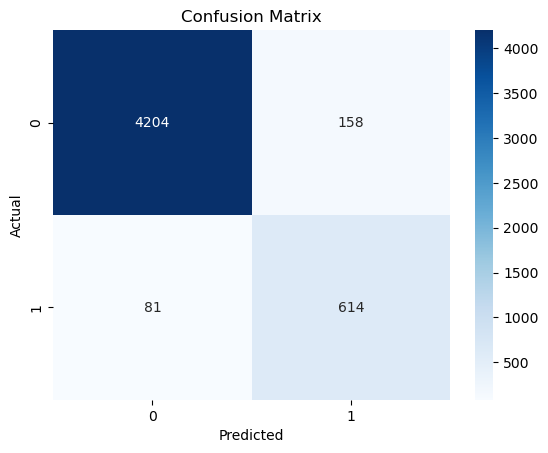

In [531]:
final_model_rf = RandomForestClassifier(**best_parameters,random_state = 42)

# Fit the model with training data 
final_model_rf.fit(X_train_smote,y_train_smote)

# Predicting labels for the test dataset using Final Random Forest model
y_pred_rf_final = final_model_rf.predict(X_test_t)

# Classification Report For Final Random Forest Model
print(classification_report(y_test,y_pred_rf_final))
print('***'*10)
print("Accuracy:", accuracy_score(y_test,y_pred_rf_final))
print('***'*10)

# confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred_rf_final), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison ( before Tuning and after Tuning):

In [529]:
print(f"The classification report using Random Forest after applying SMOTE: \n \n{classification_report(y_test,y_pred_rf_2)}")
print("--"*50)
print(f"The classification report using Random Forest after applying SMOTE and Tuning Hyperparameters :\n \n {classification_report(y_test,y_pred_rf_final)}")

The classification report using Random Forest after applying SMOTE: 
 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4362
           1       0.81      0.88      0.84       695

    accuracy                           0.95      5057
   macro avg       0.89      0.92      0.91      5057
weighted avg       0.96      0.95      0.96      5057

----------------------------------------------------------------------------------------------------
The classification report using Random Forest after applying SMOTE and Tuning Hyperparameters :
 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4362
           1       0.80      0.88      0.84       695

    accuracy                           0.95      5057
   macro avg       0.89      0.92      0.90      5057
weighted avg       0.96      0.95      0.95      5057



## Save the Model 

In [542]:
# Create the full pipeline

full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', final_model_rf)
])


# Fit pipeline on the original training data
full_pipeline.fit(X_train, y_train)


# Save the entire pipeline to a pickle file
with open("final_rf_pipeline.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)

print("Full pipeline (Scaling + SMOTE + Random Forest) saved successfully!")

Full pipeline (Scaling + SMOTE + Random Forest) saved successfully!


### Load later and predict

# Conclusion :